In [2]:
from QGRAND.statistics import get_weight_statistics
from QGRAND.encoding import get_random_parity_check_matrix
import numpy as np

In [24]:
n = 32
k = 16

In [25]:
help(get_random_parity_check_matrix)

Help on function get_random_parity_check_matrix in module QGRAND.encoding:

get_random_parity_check_matrix(n, s)
    Creates a random 2n x s parity check matrix. Note that s = n - k.
    
    Parameters
    ----------
    n : int
        Number of qubits.
    s : int
        Number of stabilizers.
    
    Returns
    -------
    2D array
        2n x s parity check matrix.
    
    Notes
    -----
    Since the stabilizers need to commute with each other, and they must 
    generate the stabilizer set, it is easier to just use the Qiskit methods, 
    instead of doing something like in `get_random_error_matrix()`.



In [26]:
parity_check_matrix = get_random_parity_check_matrix(n, n-k)

In [27]:
parity_check_matrix.shape

(16, 64)

In [28]:
help(get_weight_statistics)

Help on function get_weight_statistics in module QGRAND.statistics:

get_weight_statistics(n, k, parity_check_matrix, prob=None, max_t=None, fill_syndromes=True, errors='all')
    Statistics for a code, based on the error weight.
    
    Bernoulli noise is assumed, where the probability of an error occuring in 
    any qubit is given in `prob`. 
    
    Parameters
    ----------
    n : int
        Number of qubits in the encoding.
    k : int
        Original number of data qubits.
    parity_check_matrix : 2D array
        ((n-k) x 2n) 2D binary array, representing the parity check matrix of 
        the code.
    prob : float, list, 1D array
        Probabilities to consider, independently, for the statistics.
    max_t : int
        Maximum weight considered for the analysis. Defaults to `n`, although 
        that is too computationally hard for high `n`.
    fill_syndromes : bool, default True
        There are two approaches to check if an error has a syndrome already 
       

In [29]:
infidelity, correctable_fraction, mean_iterations = get_weight_statistics(n, k, parity_check_matrix,
                                                           prob = np.array([1e-3, 1e-2]),
                                                           max_t = 2)

In [31]:
infidelity[:2]

array([[4.86187079e-04, 4.06825858e-02],
       [2.16741227e-05, 5.27559455e-03]])

In [34]:
correctable_fraction[:2]

array([1.        , 0.96505376])

In [36]:
mean_iterations[:2]

array([[ 1.50460275, 11.3653483 ],
       [ 2.54998916, 91.04878201]])

In [9]:
from QGRAND.plotting import plot_infidelity

IndexError: too many indices for array: array is 2-dimensional, but 5 were indexed

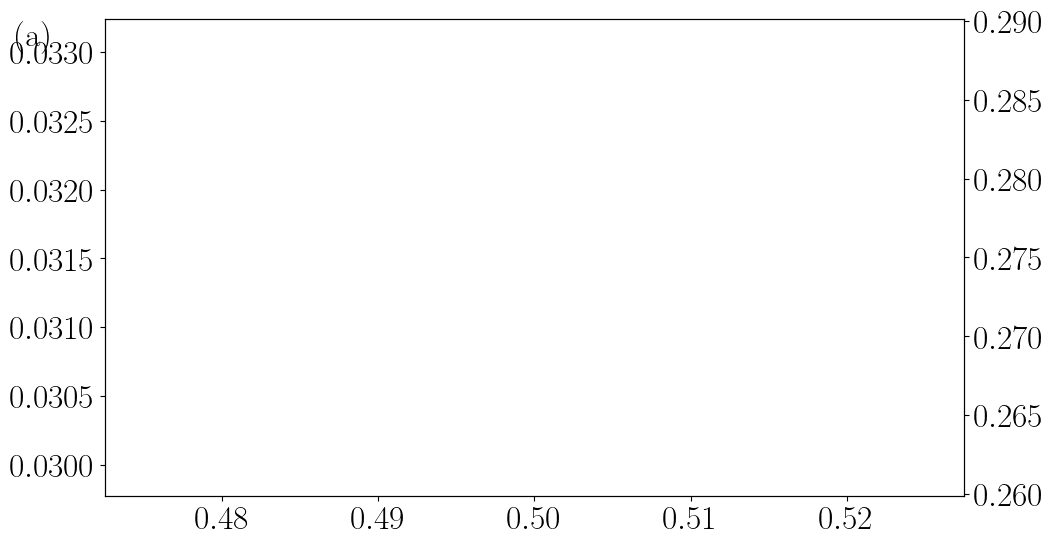

In [32]:
plot_infidelity(n, [k], [100], np.array([1e-3, 1e-2]), 2, infidelity)